# Opening data

In [2]:
import pandas as pd

#Opening csv dataset
df1 = pd.read_csv("AMDdata.csv") #AMD
df2 = pd.read_csv("SP500data.csv") #S&P500

#Choosing date and close column from data
df1 = df1[["Date", "Close"]]
df2 = df2[["Date", "Close"]]

# Checking for null values

In [3]:
print(df1["Date"].isnull().sum()) #Summing up null values and counting it
print(df1["Close"].isnull().sum())
print(df2["Date"].isnull().sum())
print(df2["Close"].isnull().sum())
#No null values

0
0
0
0


No null values exist in dataset

# Cleaning data

### Formatting date

In [4]:
#format date to DD/MM/YYYY
#AMD
for i in range(len(df1["Date"])):
    current = df1["Date"][i].split("/") #splits original format into month, date, year
    
    if len(current[2]) == 2: #transform year into 4 digits
        current[2] = "20" + current[2]
        
    if current[0][0] == "0": #removes trailing 0 for month
        current[0] = current[0][1:]
    
    new_current = "{}/{}/{}".format(current[1], current[0], current[2]) #formats into DD/MM/YYYY
    
    df1["Date"][i] = new_current #set to current row

In [5]:
#S&P 500
for i in range(len(df2["Date"])):
    current = df2["Date"][i].split("/") #splits original format into date, month, year
    
    if current[1][0] == "0": #removes trailing 0 for month
        current[1] = current[1][1:]
    
    if len(current[2]) <= 2: #transform year into 4 digits
        current[2] = "20" + current[2]
        
    new_current = "{}/{}/{}".format(current[0], current[1], current[2]) #formats into DD/MM/YYYY
         
    df2.loc[i,"Date"] = new_current #set to current row

### Reverse order of S&P500 dataset

In [6]:
new_df2 = pd.DataFrame(columns = df2.columns)
n = len(df2)-1 #backwards selector
m = 0 #counting variable

for i in range(len(df2)):
    if n == 251: #skips 26/11/2019 in S&P500
        n -= 1
        continue
        
    new_df2.loc[m] = [df2["Date"][n], df2["Close"][n]] #reverse order of S&P500 
    
    n -= 1
    m += 1

df2 = new_df2 #set new_df2 into df2

### Numeric casting for close column

In [7]:
#AMD
for i in range(len(df1["Close"])):
    current = df1["Close"][i]
    new_current = round(float(current[1:]), 2) #ignore $ sign and round to 2 d.p.
    
    df1["Close"][i] = new_current
    
df1["Close"] = df1["Close"].astype("float64") #set type of column as float

In [8]:
#S&P
for i in range(len(df2["Close"])):
    current = df2["Close"][i]
    
    new_current = round(current, 2)#round to 2 d.p.
    
    df2.loc[i,"Close"] = new_current

### Combine clean dataset

In [9]:
clean = pd.concat([df1["Date"], df1["Close"], df2["Close"]], axis=1) #join dates and close column of df1 and df2
new_cols = ["Date", "AMD Close", "S&P500 Close"] #create new column names

clean.columns = new_cols #set column names of clean dataset

clean.to_csv("CleanedData.csv", index = False) #create csv file of clean dataset

# Opening clean dataset

In [10]:
df = pd.read_csv("CleanedData.csv") #opening clean dataset

# Exploratory Analysis

### Summary Statistics

In [11]:
#AMD
summary_statistics = []
statistics_columns = ["Mean", "Median", "Standard Deviation", 
                      "Sample Variance","Kurtosis", 
                      "Skewness", "Range", "Minimum", 
                      "Maximum", "Sum", "Count"] # measures of statistics
for column in df:
    if column == "Date": #skip date
        continue
    current = [] #list holding current statistics
    
    #measures key statistics of column
    current.append(df[column].mean())
    current.append(df[column].median())
    current.append(df[column].std())
    current.append(df[column].var())
    current.append(df[column].kurt())
    current.append(df[column].skew())
    current.append(df[column].max() - df[column].min())
    current.append(df[column].min())
    current.append(df[column].max())
    current.append(df[column].sum())
    current.append(df[column].count())
    
    summary_statistics.append(current)#append statistics of column to list
    
statistics = pd.DataFrame()
for i in range(len(summary_statistics)):
    statistics[df.columns[i+1]] = summary_statistics[i]
statistics.insert(0, "Measure of statistics", statistics_columns)
statistics.set_index("Measure of statistics", inplace = True)

In [12]:
statistics

,AMD Close,S&P500 Close
Measure of statistics,,
Mean,27.846375,2859.449044
Median,28.380000,2887.610000
Standard Deviation,5.187298,154.147725
Sample Variance,26.908058,23761.521124
Kurtosis,-0.359790,0.319557
Skewness,-0.057336,-0.783527
Range,24.640000,782.540000
Minimum,16.650000,2351.100000
Maximum,41.290000,3133.640000


S&P500 has a relatively large standard deviation compared to AMD, suggesting that it is more volatile. This can be due to the companies inside S&P500, where sunset industries such as manufacturing and agriculture are more suspectible to economic downturn. 

In terms of skewness, AMD is approximately normally distributed, since skewness is close to 0. However, S&P500 is close to -1, indicating that it is left skewed. 

### Correlation and covariance

In [25]:
print("Correlaton matrix")
clean.corr()

Correlaton matrix


,AMD Close,S&P500 Close
AMD Close,1.000000,0.931726
S&P500 Close,0.931726,1.000000


Correlation between AMD and S&P500 is relatively high at 0.93, suggesting that there is a strong linear relationship between both variables

In [26]:
print("Covariance matrix")
clean.cov()

Covariance matrix


,AMD Close,S&P500 Close
AMD Close,26.908058,745.017195
S&P500 Close,745.017195,23761.521124


# Visualisation

### Distribution of S&P500

Text(0, 0.5, 'Probability')

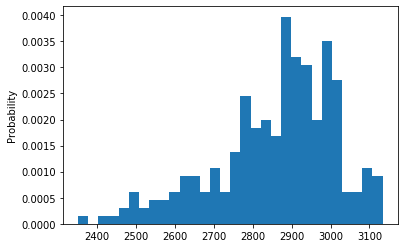

In [45]:
plt.hist(df["S&P500 Close"], density=True, bins=30)
plt.ylabel('Probability')

S&P500 is relatively left skewed and is leptokurtic

### Distribution of AMD

Text(0, 0.5, 'Probability')

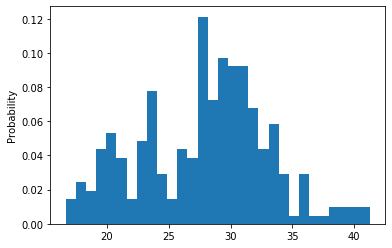

In [46]:
plt.hist(df["AMD Close"], density=True, bins=30)
plt.ylabel('Probability')

AMD is relatively symmetrical and is platykurtic

### S&P500 vs AMD

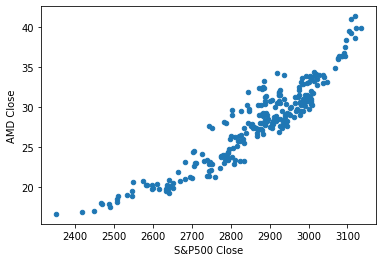

In [27]:
graph = df.plot.scatter(x = "S&P500 Close", y = "AMD Close")
graph

By observation, S&P500 and AMD has a relatively strong positive relationship. While its correlation seems to be relatively linear, it does resemble an exponential relationship.

# Building predictive model

### Linear regression model

In [16]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt

import matplotlib.pyplot as plt

X = df["S&P500 Close"]
Y = df["AMD Close"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

regr = linear_model.LinearRegression()
regr.fit(X_train[:,None], Y_train)

print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

print('-----------------------')
#stats on training data
Y_pred_train = regr.predict(X_train[:,None])
mse_train = metrics.mean_squared_error(Y_train, Y_pred_train)
R_squared_train = metrics.r2_score(Y_train, Y_pred_train)
print('Mean squared error (MSE) on train data:', mse_train)
print('Root mean squared error (RMSE) on train data:', sqrt(mse_train)) #Root mean squared error
print('Coefficient of determination (R^2) on train data:', R_squared_train)


print('-----------------------')
#stats on test data
Y_pred_test = regr.predict(X_test[:,None])
mse_test = metrics.mean_squared_error(Y_test, Y_pred_test) #difference between values predicted and values observed
R_squared_test = metrics.r2_score(Y_test, Y_pred_test) #proportion of the variance for a dependent variable that is explained by an independent variable
print('Mean squared error (MSE) on test data:', mse_test)
print('Root mean squared error (RMSE) on test data:', sqrt(mse_test)) #Root mean squared error
print('Coefficient of determination (R^2) on test data:', R_squared_test)

Coefficients: [0.03178351]
Intercept: -63.1171331594134
-----------------------
Mean squared error (MSE) on train data: 3.387053379912183
Root mean squared error (RMSE) on train data: 1.8403948978173632
Coefficient of determination (R^2) on train data: 0.8611241264167792
-----------------------
Mean squared error (MSE) on test data: 4.1668363348552635
Root mean squared error (RMSE) on test data: 2.041283011945003
Coefficient of determination (R^2) on test data: 0.8834111246790033


In [41]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train).fit()
resid_train = model.resid
fitted_train = model.fittedvalues
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              AMD Close   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1228.
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           8.04e-87
Time:                        22:57:25   Log-Likelihood:                -405.78
No. Observations:                 200   AIC:                             815.6
Df Residuals:                     198   BIC:                             822.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -63.1171      2.604    -24.238      0.000     -68.252     -57.982
S&P500 Close     0.0318      0.001     35.039      0.000       0.030       0.034
==============================================================================
Omnibus:                        9.913   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.576
Skew:                           0.551   Prob(JB):                      0.00505
Kurtosis:                       2.767   Cond. No.                     5.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Regression equation:

AMD = -63.1171 + 0.0318S&P500

In [34]:
X_test = sm.add_constant(X_test)
model = sm.OLS(Y_test, X_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              AMD Close   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     392.3
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           4.92e-25
Time:                        22:53:14   Log-Likelihood:                -107.51
No. Observations:                  51   AIC:                             219.0
Df Residuals:                      49   BIC:                             222.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -59.5303      4.388    -13.566      0.000     -68.349     -50.712
S&P500 Close     0.0307      0.002     19.807      0.000       0.028       0.034
==============================================================================
Omnibus:                        2.406   Durbin-Watson:                   2.531
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                2.271
Skew:                           0.494   Prob(JB):                        0.321
Kurtosis:                       2.696   Cond. No.                     4.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Hypothesis testing on model

Let level of significance be 0.05

Overall significance of model:

H0: All coefficients are 0

H1: At least one coefficient is not 0

F statistic is 392.3, and P(F > 392.3) = 0 < 0.05

Thus, we reject null hypothesis and model is considered to be significant

### Conclusion of regression statistics

In [35]:
print("88% of total variation in Y test is explained by variation in X")
print("Test RMS is slightly bigger than train RMS.")
print("Able to generalise.")

88% of total variation in Y test is explained by variation in X
Test RMS is slightly bigger than train RMS.
Able to generalise.


### Visualising regression model

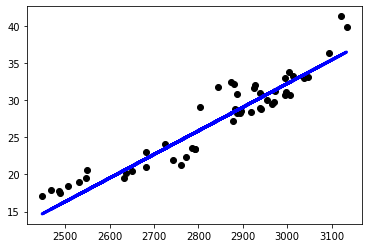

In [36]:
plt.scatter(X_test["S&P500 Close"], Y_test,  color='black')
plt.plot(X_test["S&P500 Close"], Y_pred_test, color='blue', linewidth=3)
plt.show()

# Residual analysis

### Find residuals

In [37]:
Y_pred = regr.predict(X[:,None])
residual = df["AMD Close"] - Y_pred

### Visualise residuals

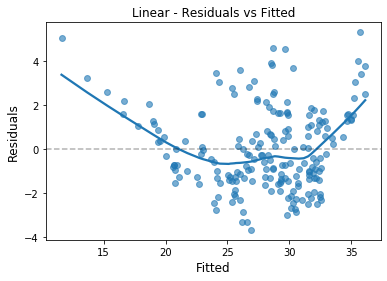

In [42]:
import seaborn as sns
fig, ax= plt.subplots()
sns.regplot(fitted_train, resid_train, lowess=True, ax=ax, scatter_kws={'s': 35, 'alpha': .6})
ax.set_xlabel('Fitted',  {'fontsize': 12})
ax.set_ylabel('Residuals', {'fontsize': 12})
ax.set_title('Linear - Residuals vs Fitted')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  
plt.show()

### Histogram of residual

Mean:  0.0801880442881674
Median:  -0.2924046168060137
Right skewed


Text(0, 0.5, 'Probability')

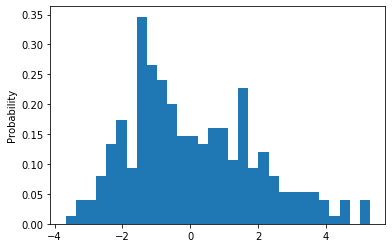

In [22]:
plt.hist(residual, density=True, bins=30)
print("Mean: ", residual.mean())
print("Median: ", residual.median())
print("Right skewed")
plt.ylabel('Probability')

### Assessment on goodness of fit

1. Linearity: Since S&P500 is comprised of multiple companies including AMD, it is safe to assume that the population model is linear
2. Exogeneity: Upon viewing residual vs fitted values plot, expected value of residual does not approximate to zero, thus, exogenity is not satisfied
3. Independence: Since market sentiment may be impacted by previous performance, each data pair of S&P500 and AMD can be correlated to eachother, thus, this data may not be independently and identically distributed
4. Finite 4th moment: Since AMD and S&P500 is bounded by natural boundaries such as liquidity in market, there is a finite 4th moment
5. Constant error variance: This holds true for values between 20 and 35, where residuals are randomly scattered.

Overall, least squares assumptions are not fully satisfied.

# Conclusion

Overall, upon analysing its correlation, S&P500 and AMD possesses strong positive linear relationship. While the linear regression model demonstrates excellent generalisability, its goodness of fit is not fully satisfied, suggesting new data transformation (log transformation) and different types of modelling (logarithmic regression models) are required to capture its true relationship. Thus, S&P500 and AMD can be considered to be highly correlated to eachother.